--- 1. Loading and Inspecting Data ---
Data loaded successfully!

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meal_id         2000 non-null   int64  
 1   meal_name       2000 non-null   object 
 2   cuisine         2000 non-null   object 
 3   meal_type       2000 non-null   object 
 4   diet_type       2000 non-null   object 
 5   calories        2000 non-null   int64  
 6   protein_g       2000 non-null   float64
 7   carbs_g         2000 non-null   float64
 8   fat_g           2000 non-null   float64
 9   fiber_g         2000 non-null   float64
 10  sugar_g         2000 non-null   float64
 11  sodium_mg       2000 non-null   int64  
 12  cholesterol_mg  2000 non-null   int64  
 13  serving_size_g  2000 non-null   int64  
 14  cooking_method  2000 non-null   object 
 15  prep_time_min   2000 non-null   int64  
 16  c

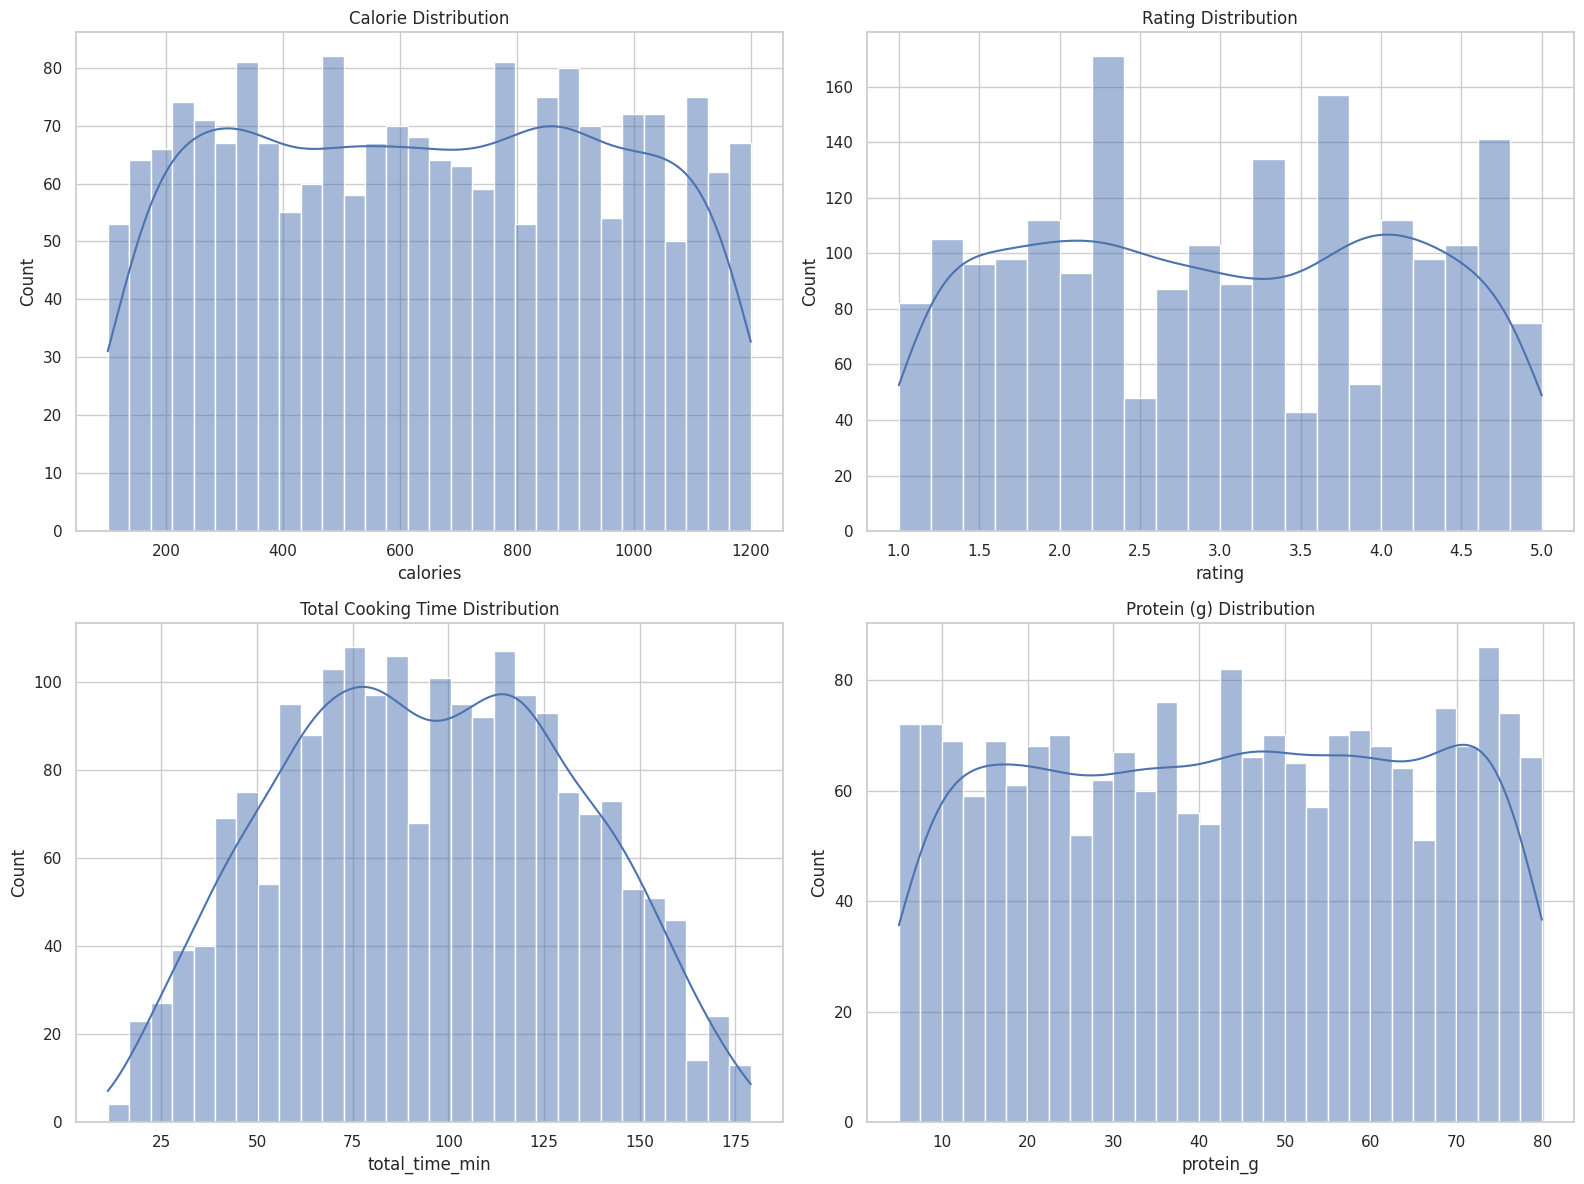

Saved top_cuisines.png


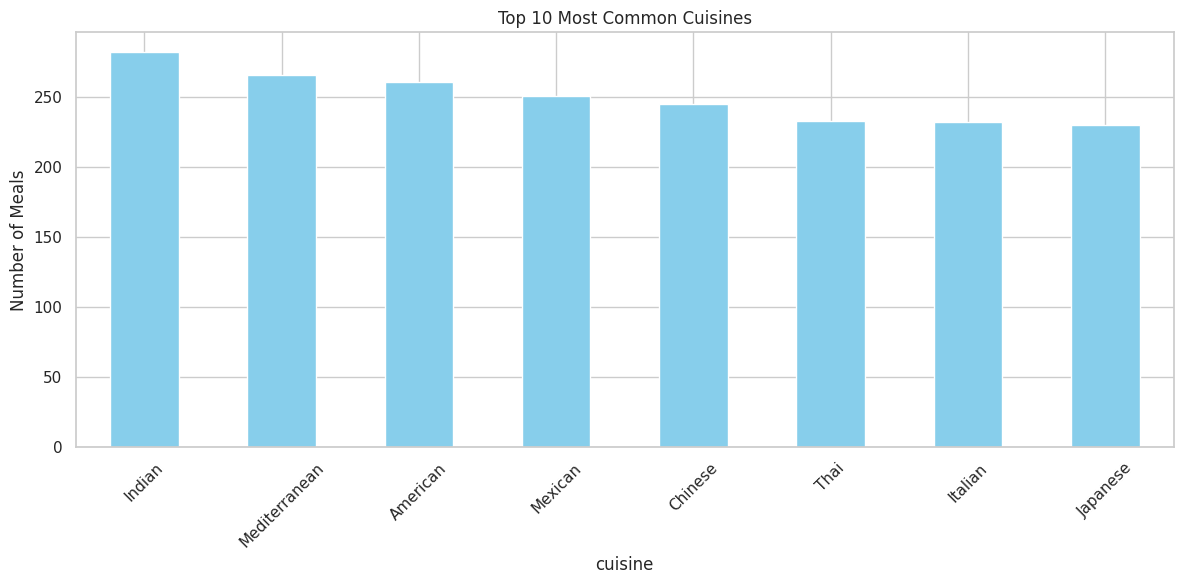

Saved calories_by_diet.png


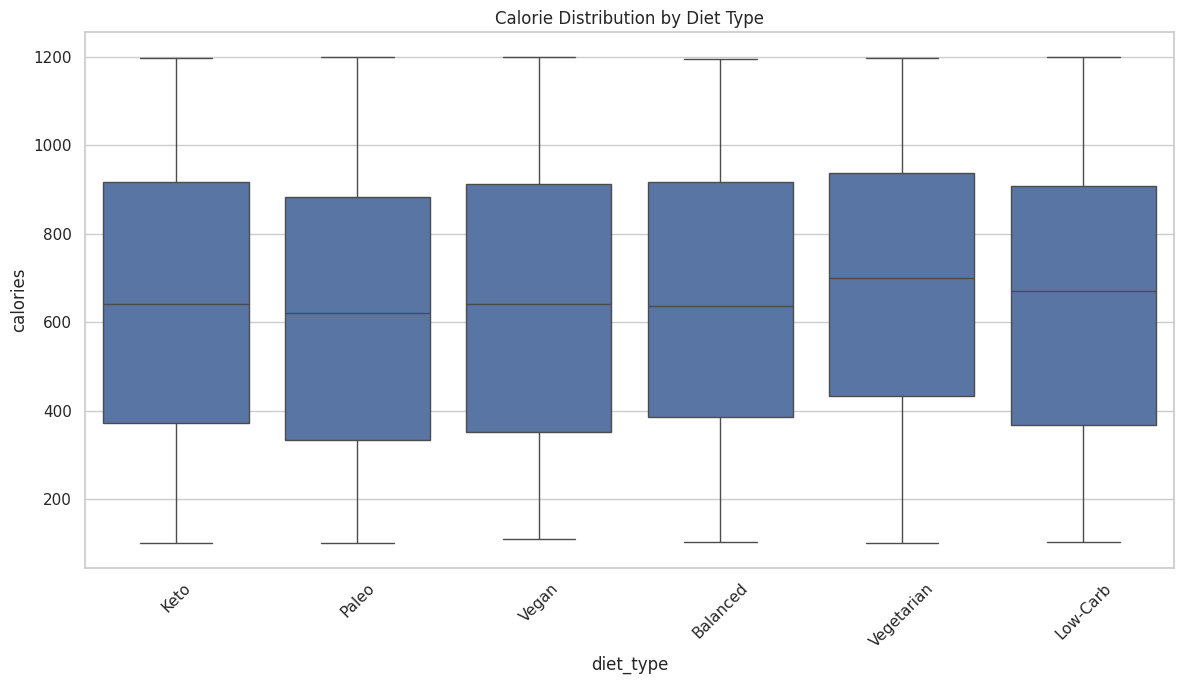

Saved correlation_heatmap.png


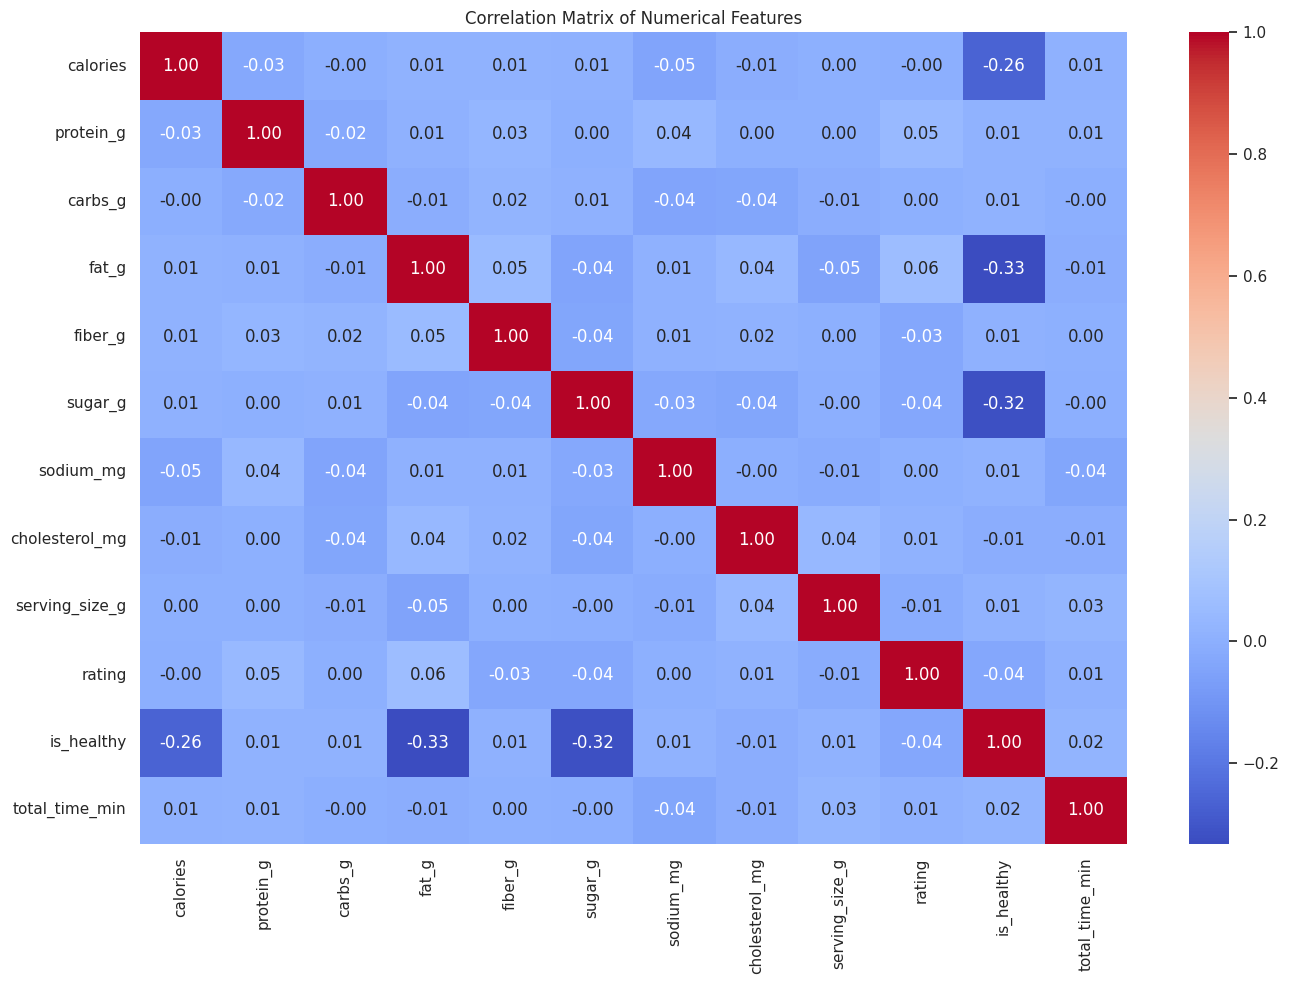

----------------------------------------

--- 5. Machine Learning Modeling ---

--- 5a. Classification Model: Predicting 'is_healthy' ---
Classification Accuracy: 0.9925
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.92      0.96        37

    accuracy                           0.99       400
   macro avg       1.00      0.96      0.98       400
weighted avg       0.99      0.99      0.99       400


--- 5b. Regression Model: Predicting 'rating' ---
Regression Mean Absolute Error (MAE): 1.0088
Regression R-squared (R²): -0.0066

--- 5c. Clustering Model: Grouping Similar Meals ---
Cluster Analysis (Mean values of features for each cluster):
           calories  protein_g    carbs_g      fat_g    fiber_g    sugar_g  \
cluster                                                                      
0        372.451745  40.381314  88.952977  15.108830  13.449897  26.712320   


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 1. Load and Inspect Data ---
try:
    print("--- 1. Loading and Inspecting Data ---")
    # Load the dataset from the CSV file
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("Data loaded successfully!")
    print("\nData Info:")
    df.info()
    print("\nFirst 5 Rows:")
    print(df.head())
    print("-" * 40)

    # --- 2. Data Cleaning and Preprocessing ---
    print("\n--- 2. Cleaning and Preprocessing Data ---")
    # Feature Engineering: Create 'total_time_min'
    df['total_time_min'] = df['prep_time_min'] + df['cook_time_min']

    # Drop original time columns and other identifiers not needed for modeling
    df_cleaned = df.drop(['meal_id', 'meal_name', 'image_url', 'prep_time_min', 'cook_time_min'], axis=1)

    print("Data has been cleaned. 'total_time_min' created.")
    print("Cleaned DataFrame head:")
    print(df_cleaned.head())
    print("-" * 40)

    # --- 3. Descriptive Statistics ---
    print("\n--- 3. Descriptive Statistics ---")
    print("Summary Statistics for Numerical Features:")
    print(df_cleaned.describe())

    print("\nValue Counts for Categorical Features:")
    print("\nCuisine Counts:")
    print(df_cleaned['cuisine'].value_counts())
    print("\nMeal Type Counts:")
    print(df_cleaned['meal_type'].value_counts())
    print("\nDiet Type Counts:")
    print(df_cleaned['diet_type'].value_counts())
    print("-" * 40)

    # --- 4. Exploratory Data Analysis (EDA) - Visualizations ---
    print("\n--- 4. Generating Visualizations for EDA ---")
    # Set plot style
    sns.set(style="whitegrid")

    # Histograms for distributions of key numerical features
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    sns.histplot(df_cleaned['calories'], bins=30, kde=True, ax=axes[0, 0]).set_title('Calorie Distribution')
    sns.histplot(df_cleaned['rating'], bins=20, kde=True, ax=axes[0, 1]).set_title('Rating Distribution')
    sns.histplot(df_cleaned['total_time_min'], bins=30, kde=True, ax=axes[1, 0]).set_title('Total Cooking Time Distribution')
    sns.histplot(df_cleaned['protein_g'], bins=30, kde=True, ax=axes[1, 1]).set_title('Protein (g) Distribution')
    plt.tight_layout()
    plt.savefig('histograms.png')
    print("Saved histograms.png")
    plt.show()

    # Bar Charts for top cuisines and diet types
    plt.figure(figsize=(12, 6))
    df_cleaned['cuisine'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Most Common Cuisines')
    plt.ylabel('Number of Meals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_cuisines.png')
    print("Saved top_cuisines.png")
    plt.show()

    # Box Plots to compare distributions
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='diet_type', y='calories', data=df_cleaned)
    plt.title('Calorie Distribution by Diet Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('calories_by_diet.png')
    print("Saved calories_by_diet.png")
    plt.show()

    # Correlation Heatmap for numerical features
    plt.figure(figsize=(14, 10))
    # Select only numeric columns for correlation matrix
    numerical_cols = df_cleaned.select_dtypes(include=np.number)
    corr_matrix = numerical_cols.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    print("Saved correlation_heatmap.png")
    plt.show()
    print("-" * 40)

    # --- 5. Machine Learning Modeling ---
    print("\n--- 5. Machine Learning Modeling ---")
    # One-hot encode categorical variables for modeling
    df_model = pd.get_dummies(df_cleaned, columns=['cuisine', 'meal_type', 'diet_type', 'cooking_method'], drop_first=True)

    # --- 5a. Classification: Predict 'is_healthy' ---
    print("\n--- 5a. Classification Model: Predicting 'is_healthy' ---")
    X_cls = df_model.drop('is_healthy', axis=1)
    y_cls = df_model['is_healthy']
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train_cls, y_train_cls)
    y_pred_cls = classifier.predict(X_test_cls)

    print(f"Classification Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.4f}")
    print("Classification Report:")
    print(classification_report(y_test_cls, y_pred_cls))

    # --- 5b. Regression: Predict 'rating' ---
    print("\n--- 5b. Regression Model: Predicting 'rating' ---")
    X_reg = df_model.drop('rating', axis=1)
    y_reg = df_model['rating']
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train_reg, y_train_reg)
    y_pred_reg = regressor.predict(X_test_reg)

    print(f"Regression Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
    print(f"Regression R-squared (R²): {r2_score(y_test_reg, y_pred_reg):.4f}")

    # --- 5c. Clustering: Grouping Similar Meals ---
    print("\n--- 5c. Clustering Model: Grouping Similar Meals ---")
    # Select features for clustering
    features_for_clustering = ['calories', 'protein_g', 'carbs_g', 'fat_g', 'fiber_g', 'sugar_g', 'sodium_mg']
    X_cluster = df_cleaned[features_for_clustering]

    # Scale the features
    scaler = StandardScaler()
    X_cluster_scaled = scaler.fit_transform(X_cluster)

    # Apply KMeans
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    df_cleaned['cluster'] = kmeans.fit_predict(X_cluster_scaled)

    # Analyze the clusters
    cluster_analysis = df_cleaned.groupby('cluster')[features_for_clustering].mean()
    print("Cluster Analysis (Mean values of features for each cluster):")
    print(cluster_analysis)

    # Save the dataframe with cluster labels to a new CSV
    df_cleaned.to_csv('healthy_eating_with_clusters.csv', index=False)
    print("\nData with cluster labels saved to 'healthy_eating_with_clusters.csv'")
    print("-" * 40)
    print("\nComprehensive analysis complete.")

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")

In [5]:
import pandas as pd
from scipy import stats

try:
    # --- 1. Load Data ---
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("--- Data loaded successfully ---\n")

    # --- 2. T-Test: Healthy vs. Unhealthy Meal Sodium Content ---
    print("--- Hypothesis Test 1: Independent T-Test ---")
    print("Question: Do healthy meals have a different average sodium content than unhealthy meals?\n")

    # Create two groups based on the 'is_healthy' flag
    healthy_meals_sodium = df[df['is_healthy'] == 1]['sodium_mg'].dropna()
    unhealthy_meals_sodium = df[df['is_healthy'] == 0]['sodium_mg'].dropna()

    # Perform the independent t-test
    t_stat, p_value_ttest = stats.ttest_ind(healthy_meals_sodium, unhealthy_meals_sodium)

    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value_ttest:.4f}")

    # Interpret the result
    alpha = 0.05
    if p_value_ttest < alpha:
        print("Result: We reject the null hypothesis. There is a significant difference in sodium content.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant difference in sodium content.\n")
    print("-" * 50)


    # --- 3. ANOVA: Calorie Differences Across Cuisines ---
    print("\n--- Hypothesis Test 2: ANOVA ---")
    print("Question: Does the average calorie count differ significantly across cuisines?\n")

    # Prepare a list of calorie data for each cuisine
    cuisines = df['cuisine'].unique()
    calories_by_cuisine = [df[df['cuisine'] == c]['calories'].dropna() for c in cuisines]

    # Perform the ANOVA test
    f_stat, p_value_anova = stats.f_oneway(*calories_by_cuisine)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value_anova:.4f}")

    # Interpret the result
    if p_value_anova < alpha:
        print("Result: We reject the null hypothesis. There is a significant difference in calorie counts among cuisines.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant difference in calorie counts.\n")
    print("-" * 50)


    # --- 4. Chi-Squared Test: Association between Cuisine and Diet Type ---
    print("\n--- Hypothesis Test 3: Chi-Squared Test ---")
    print("Question: Is there a significant association between a meal's cuisine and its diet type?\n")

    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df['cuisine'], df['diet_type'])
    print("Contingency Table:")
    print(contingency_table)

    # Perform the Chi-Squared test
    chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value_chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")

    # Interpret the result
    if p_value_chi2 < alpha:
        print("\nResult: We reject the null hypothesis. There is a significant association between cuisine and diet type.\n")
    else:
        print("\nResult: We fail to reject the null hypothesis. Cuisine and diet type are independent.\n")
    print("-" * 50)

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")

--- Data loaded successfully ---

--- Hypothesis Test 1: Independent T-Test ---
Question: Do healthy meals have a different average sodium content than unhealthy meals?

T-statistic: 0.6473
P-value: 0.5175
Result: We fail to reject the null hypothesis. There is no significant difference in sodium content.

--------------------------------------------------

--- Hypothesis Test 2: ANOVA ---
Question: Does the average calorie count differ significantly across cuisines?

F-statistic: 1.9348
P-value: 0.0605
Result: We fail to reject the null hypothesis. There is no significant difference in calorie counts.

--------------------------------------------------

--- Hypothesis Test 3: Chi-Squared Test ---
Question: Is there a significant association between a meal's cuisine and its diet type?

Contingency Table:
diet_type      Balanced  Keto  Low-Carb  Paleo  Vegan  Vegetarian
cuisine                                                          
American             64    44        45     30     3

In [6]:
import pandas as pd
from scipy import stats

try:
    # --- 1. Load Data ---
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("--- Data loaded successfully ---\n")
    alpha = 0.05 # Standard significance level

    # --- 2. Pearson Correlation Test: Sugar vs. Rating ---
    print("--- Hypothesis Test 1: Pearson Correlation ---")
    print("Question: Is there a significant linear relationship between sugar and rating?\n")

    # Create a temporary dataframe and drop rows with missing values for a clean test
    temp_df = df[['sugar_g', 'rating']].dropna()

    corr_coeff, p_value_corr = stats.pearsonr(temp_df['sugar_g'], temp_df['rating'])

    print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
    print(f"P-value: {p_value_corr:.4f}")

    if p_value_corr < alpha:
        print("Result: We reject the null hypothesis. There is a significant linear correlation.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant linear correlation.\n")
    print("-" * 50)


    # --- 3. ANOVA: Rating Differences Across Cooking Methods ---
    print("\n--- Hypothesis Test 2: ANOVA ---")
    print("Question: Does the average rating differ significantly across cooking methods?\n")

    # Prepare a list of rating data for each cooking method
    cooking_methods = df['cooking_method'].unique()
    ratings_by_method = [df[df['cooking_method'] == m]['rating'].dropna() for m in cooking_methods]

    # Perform the ANOVA test
    f_stat, p_value_anova = stats.f_oneway(*ratings_by_method)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value_anova:.4f}")

    if p_value_anova < alpha:
        print("Result: We reject the null hypothesis. There is a significant difference in ratings among cooking methods.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant difference in ratings.\n")
    print("-" * 50)


    # --- 4. T-Test: Protein in Dinner vs. Lunch ---
    print("\n--- Hypothesis Test 3: Independent T-Test ---")
    print("Question: Do Dinner meals have a different average protein content than Lunch meals?\n")

    # Create two groups for Dinner and Lunch
    dinner_protein = df[df['meal_type'] == 'Dinner']['protein_g'].dropna()
    lunch_protein = df[df['meal_type'] == 'Lunch']['protein_g'].dropna()

    t_stat_dl, p_value_ttest_dl = stats.ttest_ind(dinner_protein, lunch_protein)

    print(f"T-statistic: {t_stat_dl:.4f}")
    print(f"P-value: {p_value_ttest_dl:.4f}")

    if p_value_ttest_dl < alpha:
        print("Result: We reject the null hypothesis. There is a significant difference in protein content.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant difference in protein content.\n")
    print("-" * 50)


    # --- 5. One-Sample T-Test: Average Rating vs. Benchmark ---
    print("\n--- Hypothesis Test 4: One-Sample T-Test ---")
    print("Question: Is the average rating of all meals significantly different from 4.0?\n")

    # Define the benchmark rating
    benchmark_rating = 4.0
    ratings = df['rating'].dropna()

    t_stat_1samp, p_value_1samp = stats.ttest_1samp(ratings, popmean=benchmark_rating)

    print(f"T-statistic: {t_stat_1samp:.4f}")
    print(f"P-value: {p_value_1samp:.4f}")

    if p_value_1samp < alpha:
        print(f"Result: We reject the null hypothesis. The average meal rating is significantly different from {benchmark_rating}.\n")
    else:
        print(f"Result: We fail to reject the null hypothesis. The average rating is not significantly different from {benchmark_rating}.\n")
    print("-" * 50)

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")

--- Data loaded successfully ---

--- Hypothesis Test 1: Pearson Correlation ---
Question: Is there a significant linear relationship between sugar and rating?

Pearson Correlation Coefficient: -0.0361
P-value: 0.1063
Result: We fail to reject the null hypothesis. There is no significant linear correlation.

--------------------------------------------------

--- Hypothesis Test 2: ANOVA ---
Question: Does the average rating differ significantly across cooking methods?

F-statistic: 0.7570
P-value: 0.6038
Result: We fail to reject the null hypothesis. There is no significant difference in ratings.

--------------------------------------------------

--- Hypothesis Test 3: Independent T-Test ---
Question: Do Dinner meals have a different average protein content than Lunch meals?

T-statistic: -1.0258
P-value: 0.3052
Result: We fail to reject the null hypothesis. There is no significant difference in protein content.

--------------------------------------------------

--- Hypothesis Tes

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

try:
    # --- 1. Load Data ---
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("--- Data loaded successfully ---\n")
    alpha = 0.05 # Standard significance level

    # --- Test 1: Cooking Method vs. is_healthy ---
    print("--- Hypothesis Test 1: Cooking Method vs. Health Status ---")
    print("Question: Is there an association between cooking method and whether a meal is healthy?\n")

    # Create the contingency table
    contingency_table_1 = pd.crosstab(df['cooking_method'], df['is_healthy'])
    print("Contingency Table:")
    print(contingency_table_1)

    # Perform the Chi-Squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_1)

    print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Result: We reject the null hypothesis. There is a significant association between cooking method and health status.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant association.\n")
    print("-" * 50)


    # --- Test 2: Cuisine vs. Meal Type ---
    print("\n--- Hypothesis Test 2: Cuisine vs. Meal Type ---")
    print("Question: Is there an association between cuisine and meal type?\n")

    contingency_table_2 = pd.crosstab(df['cuisine'], df['meal_type'])
    print("Contingency Table:")
    print(contingency_table_2)

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_2)

    print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Result: We reject the null hypothesis. There is a significant association between cuisine and meal type.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant association.\n")
    print("-" * 50)


    # --- Test 3: Diet Type vs. Cooking Method ---
    print("\n--- Hypothesis Test 3: Diet Type vs. Cooking Method ---")
    print("Question: Is there an association between diet type and cooking method?\n")

    contingency_table_3 = pd.crosstab(df['diet_type'], df['cooking_method'])
    print("Contingency Table:")
    print(contingency_table_3)

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_3)

    print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Result: We reject the null hypothesis. There is a significant association between diet type and cooking method.\n")
    else:
        print("Result: We fail to reject the null hypothesis. There is no significant association.\n")
    print("-" * 50)

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")

--- Data loaded successfully ---

--- Hypothesis Test 1: Cooking Method vs. Health Status ---
Question: Is there an association between cooking method and whether a meal is healthy?

Contingency Table:
is_healthy        0   1
cooking_method         
Baked           270  24
Boiled          272  34
Fried           286  29
Grilled         224  19
Raw             241  26
Roasted         263  32
Steamed         257  23

Chi-Squared Statistic: 3.5419
P-value: 0.7384
Result: We fail to reject the null hypothesis. There is no significant association.

--------------------------------------------------

--- Hypothesis Test 2: Cuisine vs. Meal Type ---
Question: Is there an association between cuisine and meal type?

Contingency Table:
meal_type      Breakfast  Dinner  Lunch  Snack
cuisine                                       
American              68      61     71     61
Chinese               58      68     66     53
Indian                64      79     61     78
Italian               56     

Dataset loaded successfully.
Plot saved as 'calories_vs_carbs_by_cuisine.png'


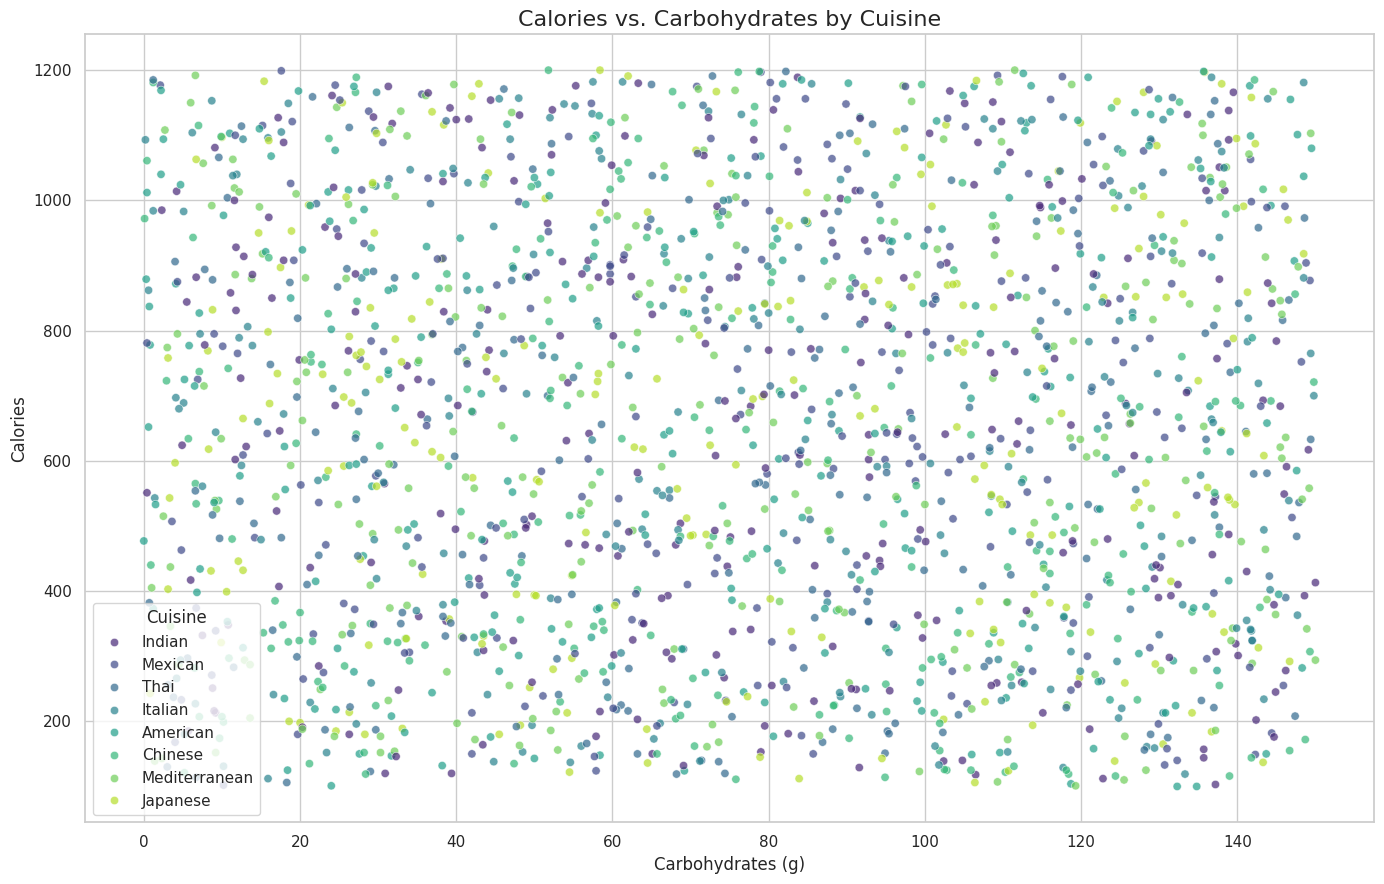

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Load the dataset
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("Dataset loaded successfully.")

    # Create the plot
    plt.figure(figsize=(14, 9))
    sns.scatterplot(
        data=df,
        x='carbs_g',
        y='calories',
        hue='cuisine', # Color points by cuisine
        alpha=0.7,     # Use transparency to see overlapping points
        palette='viridis' # A nice color palette
    )

    # Add titles and labels for clarity
    plt.title('Calories vs. Carbohydrates by Cuisine', fontsize=16)
    plt.xlabel('Carbohydrates (g)', fontsize=12)
    plt.ylabel('Calories', fontsize=12)
    plt.legend(title='Cuisine')
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    plt.savefig('calories_vs_carbs_by_cuisine.png')
    print("Plot saved as 'calories_vs_carbs_by_cuisine.png'")

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")

Dataset loaded successfully.
Elbow method plot saved as 'elbow_method.png'
Cluster plot saved as 'calories_carbs_clusters.png'


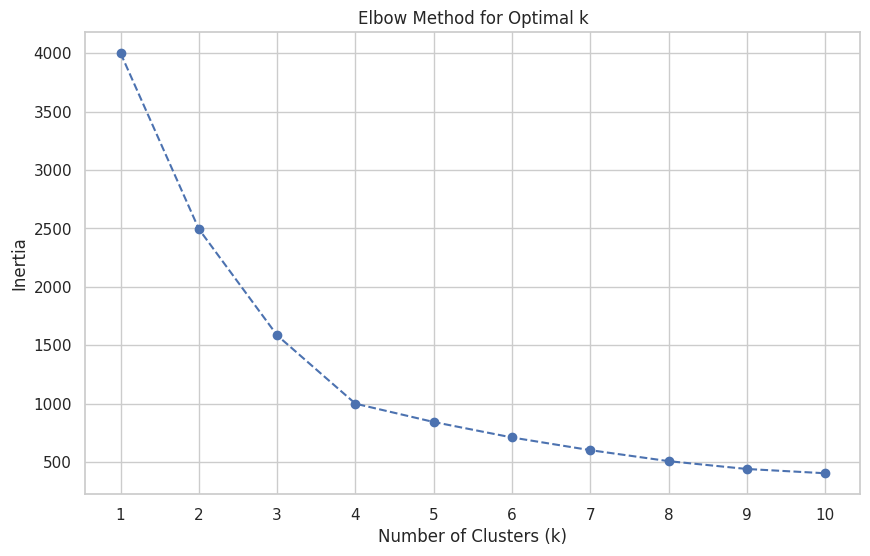

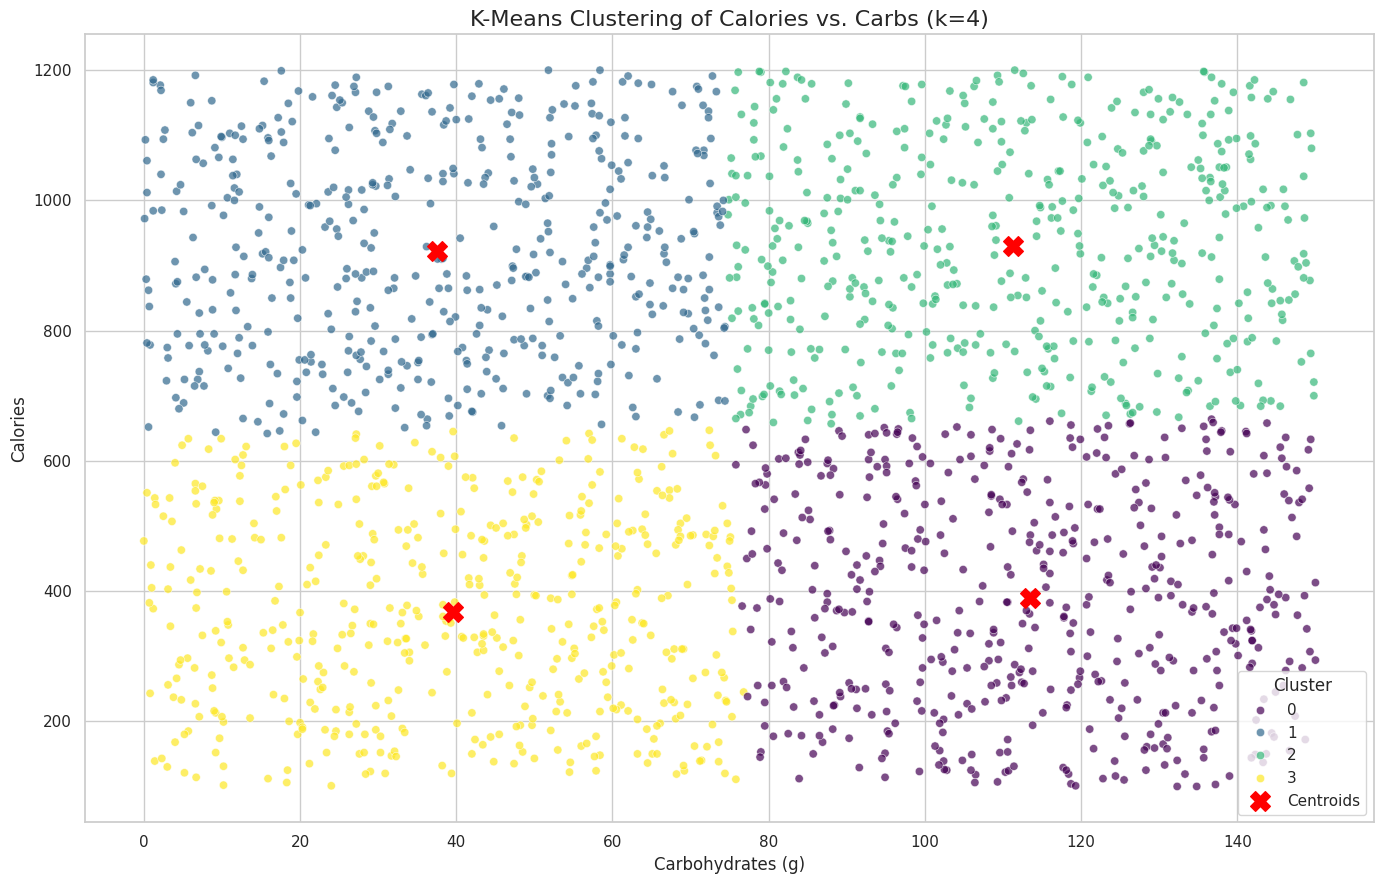

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- 1. Load and Prepare Data ---
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("Dataset loaded successfully.")

    # Select the features for clustering and remove any missing values
    features = df[['calories', 'carbs_g']].dropna()

    # Scale the data: This is crucial for K-Means to work correctly
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # --- 2. Find the Optimal Number of Clusters (Elbow Method) ---
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method results
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid(True)
    plt.savefig('elbow_method.png')
    print("Elbow method plot saved as 'elbow_method.png'")


    # --- 3. Apply K-Means and Visualize Clusters ---
    # From the Elbow plot, choose the optimal k (e.g., 4 seems like a good elbow point)
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

    # Fit the model and predict the clusters
    cluster_labels = kmeans.fit_predict(features_scaled)

    # Add the cluster labels to our features DataFrame
    features['cluster'] = cluster_labels

    # Get the coordinates of the cluster centers
    centroids_scaled = kmeans.cluster_centers_
    # Inverse transform the centroids to plot them on the original scale
    centroids = scaler.inverse_transform(centroids_scaled)

    # Visualize the clusters
    plt.figure(figsize=(14, 9))
    sns.scatterplot(
        data=features,
        x='carbs_g',
        y='calories',
        hue='cluster',
        palette='viridis',
        alpha=0.7,
        legend='full'
    )
    # Plot the centroids
    plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='red', marker='X', label='Centroids')

    plt.title(f'K-Means Clustering of Calories vs. Carbs (k={optimal_k})', fontsize=16)
    plt.xlabel('Carbohydrates (g)', fontsize=12)
    plt.ylabel('Calories', fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()

    plt.savefig('calories_carbs_clusters.png')
    print(f"Cluster plot saved as 'calories_carbs_clusters.png'")

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")

Dataset loaded successfully.
Generating pairplot... this may take a moment.
Plot saved as 'nutritional_pairplot.png'


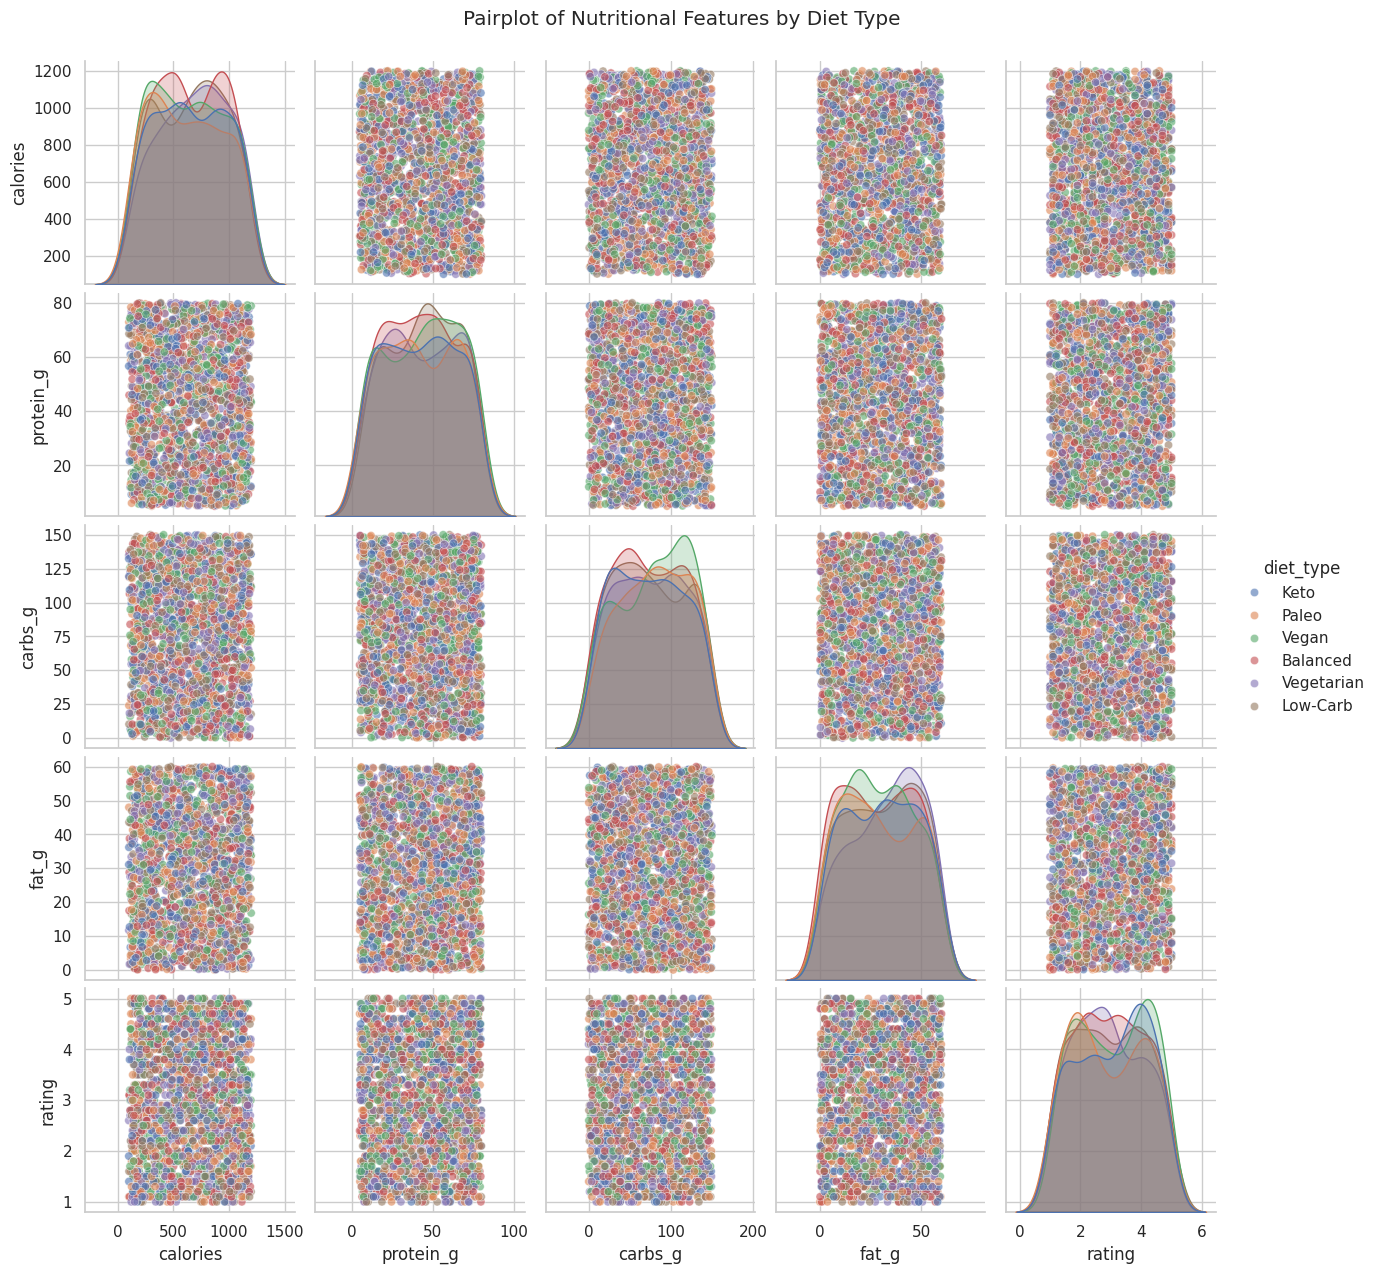

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Load the dataset
    df = pd.read_csv('healthy_eating_dataset.csv')
    print("Dataset loaded successfully.")

    # Select a subset of columns for a clear and meaningful pairplot
    columns_for_plot = [
        'calories',
        'protein_g',
        'carbs_g',
        'fat_g',
        'rating',
        'diet_type' # Used for coloring the points
    ]

    df_subset = df[columns_for_plot].dropna()

    # Create the pairplot
    print("Generating pairplot... this may take a moment.")
    pairplot_fig = sns.pairplot(
        df_subset,
        hue='diet_type', # Color the plots by the diet type
        palette='deep',
        plot_kws={'alpha': 0.6} # Add some transparency
    )

    # Add a main title to the plot
    pairplot_fig.fig.suptitle('Pairplot of Nutritional Features by Diet Type', y=1.02)

    # Save the figure
    plt.savefig('nutritional_pairplot.png')
    print("Plot saved as 'nutritional_pairplot.png'")

except FileNotFoundError:
    print("Error: 'healthy_eating_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")